# Chi-square goodness of fit test for Poisson

Goal:
Cargo arrival and departure in each 60-min interval on busy days (excluding Sunday and Monday) can bee seen as roughly following Poisson Distribution (within non-rejection threshold)

Data:
Arrival cargos on 10 am for 25 busy days of 2015-8 


In [19]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt

data=[62,42,26,43,47,45,66,69,38,39,46,44,67,59,56,60,41,55,62,59,64,72,44,36,47]
data=numpy.array(data)
mean=numpy.mean(data)
min=numpy.min(data)
max=numpy.max(data)
data_bins = numpy.linspace(min, max, 6)
data_his=numpy.histogram(data, data_bins)[0]
data_his

array([1, 8, 4, 7, 5])

In [22]:
poisson=numpy.random.poisson(mean,10000)
poisson_bins = numpy.linspace(min, max, 6)
poisson_freq=numpy.histogram(poisson, poisson_bins)[0]/len(poisson)
# sum!=1 as possion distribution has value out of (338,451)
poisson_his=len(data)*poisson_freq
# print(sum(data_his)) 
# print(sum(poisson_his))
poisson_his

array([  0.245 ,   3.71  ,  11.335 ,   8.0175,   1.625 ])

In [23]:
sum=0
for bin_idx in range(5):
    sum+=(data_his[bin_idx]-poisson_his[bin_idx])**2/poisson_his[bin_idx]
sum

19.172609823684766

The number of constraint of Poison Distribution is 1 (Poison rate), so the degree of freedom is n-1-1= n-2 = 25-2 = 23. By looking up chart, the rejection threshold of Chi-square(23) for alpha=0.05 is 35.172 > 119.172609823684766

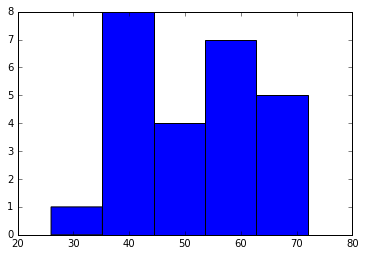

In [24]:
plt.hist(data, bins=data_bins)
plt.show()

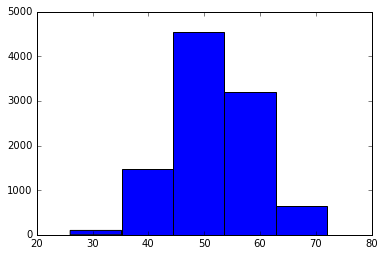

In [25]:
plt.hist(poisson, bins=poisson_bins)
plt.show()